[Reference](https://python.plainenglish.io/create-powerpoint-presentation-using-python-168ff73c04e9)

# Gather the visualizations


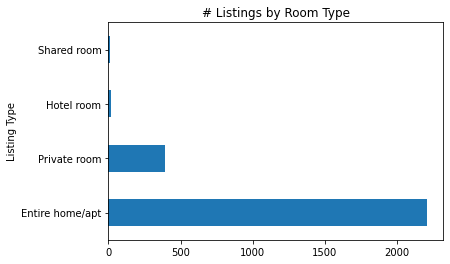

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import requests
import io

#The python visualization in this example will be created from publicly available AirBnb data
#url of AirBnb data for Ashville, NC
url = "http://data.insideairbnb.com/united-states/nc/asheville/2021-12-15/visualisations/listings.csv"

#request data from the url
listingsFile = requests.get(url)

#encode in pandas dataframe
listings = pd.read_csv(io.StringIO(listingsFile.text), index_col=0)

#We're going to look at the number of listings by room type
room_type_counts = listings.room_type.value_counts()
bar_plot = room_type_counts.plot(kind='barh',  
                                 xlabel='Listing Type', 
                                 #figsize=(15,10), 
                                 title = '# Listings by Room Type')

#save bar plot to png file
bar_plot.get_figure().savefig('room_types.png', bbox_inches='tight')

# Create the PowerPoint file


In [4]:
!pip install python-pptx

     |████████████████████████████████| 10.1 MB 10.9 MB/s 
     |████████████████████████████████| 149 kB 47.3 MB/s 
  Created wheel for python-pptx: filename=python_pptx-0.6.21-py3-none-any.whl size=470951 sha256=8c2bb2cf58627f50e8ce5bb6a53701c47b7f8c268c0279a2c350fa0c2a4b926d
  Stored in directory: /root/.cache/pip/wheels/a7/ab/f4/52560d0d4bd4055e9261c6df6e51c7b56c2b23cca3dee811a3
Successfully built python-pptx


In [5]:
from pptx import Presentation
from pptx.util import Inches

#Create blank PowerPoint file
prs = Presentation()

#set slide template labels. This just makes is easier to read the code. The layout index can also be used.                   
SLD_LAYOUT_TITLE = 0
SLD_LAYOUT_TITLE_AND_CONTENT = 1
SLD_LAYOUT_TITLE_ONLY = 5

In [6]:
#Set title page text variables
slide_title = "Looker Report"
slide_subtitle = dt.datetime.today().strftime('%m/%d/%Y')

#Add a title slide
slide_layout = prs.slide_layouts[SLD_LAYOUT_TITLE]
slide = prs.slides.add_slide(slide_layout)

#Insert title slide text
slide.shapes[0].text = slide_title
slide.shapes[1].text = slide_subtitle

# Insert the Title slide


In [7]:
#Set title page text variables
slide_title = "Looker Report"
slide_subtitle = dt.datetime.today().strftime('%m/%d/%Y')

#Add a title slide
slide_layout = prs.slide_layouts[SLD_LAYOUT_TITLE]
slide = prs.slides.add_slide(slide_layout)

#Insert title slide text
slide.shapes[0].text = slide_title
slide.shapes[1].text = slide_subtitle

# Add Looker visualizations

In [11]:
#Set slide title and image locations
slide_title = "Images from Looker"

#create a dictionary of file names and the location they will be placed on slide
shape_location = {"DaysBooked.png": {"top": Inches(2.2), "left": Inches(0)},
                  "GrossPayments.png": {"top": Inches(2.2), "left": Inches(2.78)},
                  "Reviews.png": {"top": Inches(2.2), "left": Inches(6.47)}}

#Add a slide
slide_layout = prs.slide_layouts[SLD_LAYOUT_TITLE_ONLY]
slide = prs.slides.add_slide(slide_layout)

#Add slide title
slide.shapes[0].text = slide_title

#Add slide images
for image, location in shape_location.items():
  #insert images into slide at the specified location. This will place the 3 images in a row next to each other.
  slide.shapes.add_picture(image, location['left'], location['top'])

# Add python visualization

In [9]:
#Set slide title and image locations
slide_title = "Images from Python"

#create a dictionary of file names and the location they will be placed on slide
shape_location = {"room_types.png": {"top": Inches(1.92), "left": Inches(1.88)}}

#Add a slide
slide_layout = prs.slide_layouts[SLD_LAYOUT_TITLE_ONLY]
slide = prs.slides.add_slide(slide_layout)

#Add slide title
slide.shapes[0].text = slide_title

#Add slide images
for image, location in shape_location.items():
  #insert images into slide at the specified location. This will place a single image in the center of the slide.
  slide.shapes.add_picture(image, location['left'], location['top'])

# Save the PowerPoint file

In [10]:
prs.save("Sample_Report.pptx")